In [1]:
! pip install mplfinance

     |████████████████████████████████| 51kB 1.6MB/s 


In [2]:
! pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=25d0e9d8405c0196f94c4b4867f44b48bb07b2701bf4f3d59bbe7d8fd9247af6
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import requests
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# set tickers
# tickers = ["^GSPC", "EURUSD=X", "USDJPY=X"]
ticker = "^GSPC"
# set the start date and end date
start = "1985-01-01"
end = "2020-06-30"

In [5]:
df = yf.download(ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [6]:
# split the dataset into trainset and test
# The last 4 years is the test set  
test_df = df[-252*4:]
train_df = df[:len(df) - 252*4]

In [7]:
# A function to return the start dates array
def start_dates(dframe, df_start, term_days, ahead_days):
  return np.arange(0, len(dframe)-term_days - ahead_days, int(term_days/3)) # 10 days sliding

In [ ]:
# Not used yet
# A function to compute the momemtum return
# This function works only inside the candle_stick function
def momentum_ret(df_start, term_days, ahead_days): 
    # set the start date and ending date
    df_start = df_start
    df_end = df_start + term_days
    df_flag_date = df_end + ahead_days

    # set the starting date to determine the momentum factor
    df_mom_start = df_end - 5

    # grab the price
    mom_start_price = df[df_mom_start:df_mom_start+1].Close.values 
    final_price = df[df_end:df_end+1].Close.values
    flag_price = df[df_flag_date:df_flag_date+1].Close.values

    # set the strategy and compute the return
    if final_price > mom_start_price*1.05:
      strategy = "long"
      profit = (flag_price - final_price) / final_price

    elif final_price < mom_start_price*0.95:
      strategy = "short"
      profit = (final_price - flag_price) / final_price

    else:
      strategy = "no position"
      profit = 0

    return (strategy, profit)

In [8]:
# A function to return the flag(up, flat, or down)
# This function works only inside the candle_stick function
def three_flags(df_start, term_days, ahead_days): 
    df_start = df_start
    df_end = df_start + term_days
    df_flag_date = df_end + ahead_days 
    final_price = df[df_end:df_end+1].Close.values
    flag_price = df[df_flag_date:df_flag_date+1].Close.values

    if flag_price > final_price*1.005:
      flag = "up"
    elif flag_price < final_price*0.995:
      flag = "down"
    else:
      flag = "flat"

    return flag

In [9]:
# A function to create a candle_stick with MA25 and store it to a directory with the first date in its file name
# pass dataframe from the yfinace as the first argument
# The 2nd argument is the start_date index of the datafrtame
# The 3rd argument is the term of the subset dataframe, i.e. set 30 for 30 days
# The 4th argument is the forecaset period, i.e. set 3 for 3 days ahead foracasting
# Set "train" or "test" for the 5th argument  
def candle_stick(dframe, df_start, term_days, ahead_days,test_or_train): 

  df_start = df_start
  df_end = df_start + term_days

  df = dframe[df_start:df_end]

  # grab the first date in the dataframe
  date_from = str(df.index[0])[:10]
  
  # extract the rows from the original dataframe
  df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
  
  # rename the columns 
  df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
  
  # params for the candle stick
  mc = mpf.make_marketcolors(up='g',down='r')
  s  = mpf.make_mpf_style(marketcolors=mc)

  # grab the flag by the three_flags fuinction
  flag = three_flags(df_start, term_days, ahead_days)

  # momentum function 
  strategy, profit = momentum_ret(df_start, term_days, ahead_days)

  # set the directory acoroding to the flag(up,flat, or down)
  # store the image data to a different directory
  dir = flag + "_data" 
  
  # return the plot and save it to a specific directory with unique file name
  # mount on google drive before run this code or you can set other local directory
  # To run a classifier we should either inculde the flag (up, down, or flat) in the file name 
  # or store the files in different directories according to its flag
  # Change the data_# number to store the data into different directories
  return mpf.plot(df,type='candle', mav=25, style=s, figratio=(15,15),savefig='/content/drive/My Drive/capstone_data/{}_data_3/{}/{}_mpf_candle_{}.png'.format(test_or_train, dir,flag,date_from))
  f = open('{0}.csv'.format(name), 'wb')

 Execute the funtion

Five days ahead

In [ ]:
# Train_set
# Loop over the train set
# Three days ahead
for i_date in start_dates(train_df,0,30,5):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(train_df,i_date,30,5,"train")

In [ ]:
# Test_set
# Loop over the test set
# Three days ahead
for i_date in start_dates(test_df,0,30,5):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(test_df,i_date,30,5,"test")

Three days ahead

In [ ]:
# Train_set
# Loop over the train set
# Three days ahead
for i_date in start_dates(train_df,0,30,3):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(train_df,i_date,30,3,"train")

In [ ]:
# Test_set
# Loop over the test set
# Three days ahead
for i_date in start_dates(test_df,0,30,3):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(test_df,i_date,30,3,"test")

One day ahead

In [ ]:
# Train_set
# Loop over the train set
# One days ahead
for i_date in start_dates(train_df,0,30,1):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(train_df,i_date,30,1,"train")

In [ ]:
# Test_set
# Loop over the test set
# One days ahead
for i_date in start_dates(test_df,0,30,1):
  # execute the function, create candle stick charts and store into the directory
  candle_stick(test_df,i_date,30,1,"test")

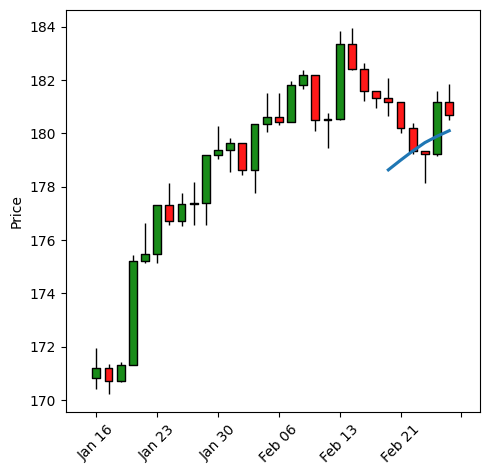

In [ ]:
# a sample chart
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df[10:40],type='candle', mav=25, style=s, figratio=(8,8))

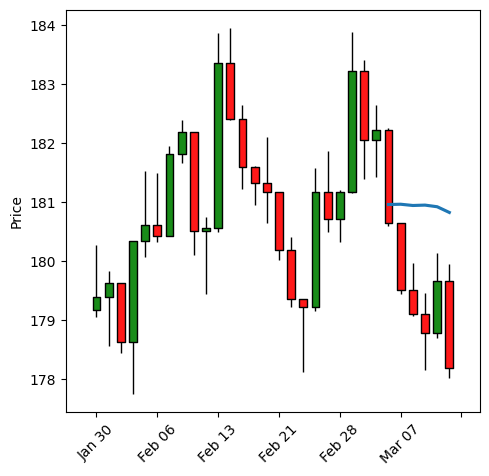

In [ ]:
# a sample chart slinding 10 days
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df[20:50],type='candle', mav=25, style=s, figratio=(8,8))